## <center>Association Rules Assignment(Books)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots .</code>


In [1]:
#!pip install mlxtend


In [2]:
#Importing the necessary libraries for the model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
#Importing the csv file and having a glance at the data
book_data = pd.read_csv('book.csv')
book_data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


#### Making necessary EDA for the model

In [4]:
#Checking the rows and columns of the data
book_data.shape

(2000, 11)

In [5]:
#Checking for the datatypes and null values if present any
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
#Looking into statistical report of the data
book_data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building the Associaton Rules

#### Model1:Support=0.1

In [7]:
#Building the apriori algorithm with the support of 0.1
book_sets = apriori(book_data, min_support=0.1, use_colnames=True)
book_sets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [8]:
#Building the association rule with the lift as the metric and min threshold of 0.8
Assoc_rules1 = association_rules(book_sets, metric="lift", min_threshold=0.8)
Assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [9]:
#Sorting the Association rules in ascending order wrt to lift 
Assoc_rules1.sort_values('lift',ascending = False,inplace=True)
Assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [10]:
#Checking the associated books for childbks 
bookname='ChildBks'
rules1_ChildBks =(Assoc_rules1.lift>1) & (Assoc_rules1['antecedents'].astype(str).str.contains(bookname))
Assoc_rules1.loc[rules1_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
78,"(ArtBks, ChildBks)",(GeogBks)
53,"(CookBks, ChildBks)",(RefBks)
77,"(GeogBks, ChildBks)",(ArtBks)
65,"(CookBks, ChildBks)",(GeogBks)
72,"(DoItYBks, ChildBks)",(GeogBks)
59,"(CookBks, ChildBks)",(ArtBks)
42,"(CookBks, ChildBks)",(YouthBks)
47,"(CookBks, ChildBks)",(DoItYBks)
71,"(GeogBks, ChildBks)",(DoItYBks)
57,(ChildBks),"(CookBks, RefBks)"


In [11]:
#Checking the associated books for cookbks 
bookname='CookBks'
rules1_CookBks =(Assoc_rules1.lift>1) & (Assoc_rules1['antecedents'].astype(str).str.contains(bookname))
Assoc_rules1.loc[rules1_CookBks,["antecedents","consequents"]]

,antecedents,consequents
28,(CookBks),(ItalCook)
83,"(CookBks, DoItYBks)",(ArtBks)
95,"(CookBks, ArtBks)",(GeogBks)
94,"(CookBks, GeogBks)",(ArtBks)
53,"(CookBks, ChildBks)",(RefBks)
82,"(CookBks, ArtBks)",(DoItYBks)
65,"(CookBks, ChildBks)",(GeogBks)
89,"(CookBks, DoItYBks)",(GeogBks)
59,"(CookBks, ChildBks)",(ArtBks)
42,"(CookBks, ChildBks)",(YouthBks)


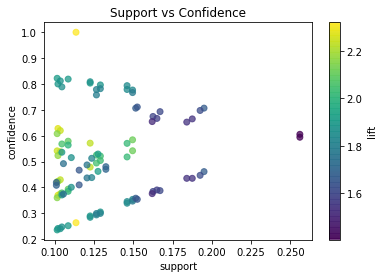

In [12]:
#Visualizing the Support Vs Confidence with lift metric
plt.scatter(Assoc_rules1['support'], Assoc_rules1['confidence'],c=Assoc_rules1['lift'],cmap= 'viridis',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

#### Model2:Support=0.15

In [13]:
#Building the apriori algorithm with the support of 0.15
book_sets2 = apriori(book_data, min_support=0.15, use_colnames=True)
book_sets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [14]:
#Building the association rule with the lift as the metric and min threshold of 0.8
Assoc_rules2 = association_rules(book_sets2, metric="lift", min_threshold=0.8)
Assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [15]:
#Sorting the Association rules in ascending order wrt to lift 
Assoc_rules2.sort_values('lift',ascending = False,inplace=True)
Assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


In [16]:
#Checking the associated books for childbks 
bookname='ChildBks'
rules2_ChildBks =(Assoc_rules2.lift>1) & (Assoc_rules2['antecedents'].astype(str).str.contains(bookname))
Assoc_rules2.loc[rules2_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
11,(ChildBks),(GeogBks)
7,(ChildBks),(RefBks)
9,(ChildBks),(ArtBks)
1,(ChildBks),(YouthBks)
5,(ChildBks),(DoItYBks)
3,(ChildBks),(CookBks)


In [17]:
#Checking the associated books for cookbks 
bookname='CookBks'
rules2_CookBks =(Assoc_rules2.lift>1) & (Assoc_rules2['antecedents'].astype(str).str.contains(bookname))
Assoc_rules2.loc[rules2_CookBks,["antecedents","consequents"]]

,antecedents,consequents
16,(CookBks),(RefBks)
20,(CookBks),(GeogBks)
18,(CookBks),(ArtBks)
14,(CookBks),(DoItYBks)
13,(CookBks),(YouthBks)
2,(CookBks),(ChildBks)


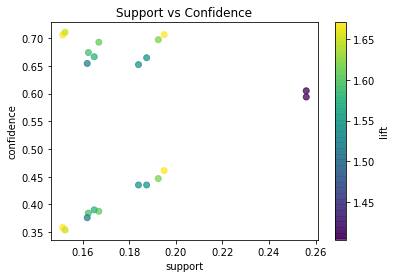

In [18]:
#Visualizing the Support Vs Confidence with lift metric
plt.scatter(Assoc_rules2['support'], Assoc_rules2['confidence'],c=Assoc_rules2['lift'],cmap= 'viridis',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

#### Model3:Support=0.2

In [19]:
#Building the apriori algorithm with the support of 0.2
book_sets3 = apriori(book_data, min_support=0.2, use_colnames=True)
book_sets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [20]:
#Building the association rule with the lift as the metric and min threshold of 0.8
Assoc_rules3 = association_rules(book_sets3, metric="lift", min_threshold=0.8)
Assoc_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [21]:
#Checking the associated books for childbks 
bookname='ChildBks'
rules3_ChildBks =(Assoc_rules3.lift>1) & (Assoc_rules3['antecedents'].astype(str).str.contains(bookname))
Assoc_rules3.loc[rules3_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
1,(ChildBks),(CookBks)


In [22]:
#Checking the associated books for cookbks 
bookname='CookBks'
rules3_CookBks =(Assoc_rules3.lift>1) & (Assoc_rules3['antecedents'].astype(str).str.contains(bookname))
Assoc_rules3.loc[rules3_CookBks,["antecedents","consequents"]]

,antecedents,consequents
0,(CookBks),(ChildBks)


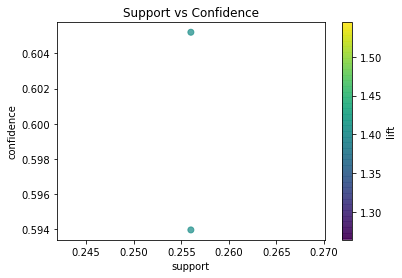

In [23]:
#Visualizing the Support Vs Confidence with lift metric
plt.scatter(Assoc_rules3['support'], Assoc_rules3['confidence'],c=Assoc_rules3['lift'],cmap= 'viridis',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

#### Model4:Support=0.04

In [24]:
#Building the apriori algorithm with the support of 0.2
book_sets4 = apriori(book_data, min_support=0.04, use_colnames=True)
book_sets4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(GeogBks, RefBks, YouthBks, ChildBks, CookBks)"
129,0.0465,"(GeogBks, YouthBks, ChildBks, CookBks, ArtBks)"
130,0.0450,"(GeogBks, RefBks, DoItYBks, ChildBks, CookBks)"
131,0.0535,"(GeogBks, DoItYBks, ChildBks, CookBks, ArtBks)"


In [25]:
#Building the association rule with the lift as the metric and min threshold of 0.8
Assoc_rules4 = association_rules(book_sets4, metric="lift", min_threshold=0.8)
Assoc_rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
1061,(GeogBks),"(CookBks, ArtBks, RefBks, ChildBks)",0.2760,0.0610,0.0405,0.146739,2.405560,0.023664,1.100484
1062,(RefBks),"(CookBks, GeogBks, ArtBks, ChildBks)",0.2145,0.0835,0.0405,0.188811,2.261212,0.022589,1.129823
1063,(ChildBks),"(CookBks, GeogBks, ArtBks, RefBks)",0.4230,0.0460,0.0405,0.095745,2.081406,0.021042,1.055012
1064,(CookBks),"(GeogBks, ArtBks, RefBks, ChildBks)",0.4310,0.0495,0.0405,0.093968,1.898334,0.019166,1.049079


In [26]:
#Checking the associated books for childbks 
bookname='ChildBks'
rules4_ChildBks =(Assoc_rules4.lift>1) & (Assoc_rules4['antecedents'].astype(str).str.contains(bookname))
Assoc_rules4.loc[rules4_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
1,(ChildBks),(YouthBks)
3,(ChildBks),(CookBks)
5,(ChildBks),(DoItYBks)
7,(ChildBks),(RefBks)
9,(ChildBks),(ArtBks)
...,...,...
1052,"(GeogBks, ChildBks)","(CookBks, ArtBks, RefBks)"
1055,"(RefBks, ChildBks)","(CookBks, GeogBks, ArtBks)"
1058,"(CookBks, ChildBks)","(GeogBks, ArtBks, RefBks)"
1059,"(ArtBks, ChildBks)","(CookBks, GeogBks, RefBks)"


In [27]:
#Checking the associated books for cookbks 
bookname='CookBks'
rules4_CookBks =(Assoc_rules4.lift>1) & (Assoc_rules4['antecedents'].astype(str).str.contains(bookname))
Assoc_rules4.loc[rules4_CookBks,["antecedents","consequents"]]

,antecedents,consequents
2,(CookBks),(ChildBks)
17,(CookBks),(YouthBks)
28,(CookBks),(DoItYBks)
30,(CookBks),(RefBks)
32,(CookBks),(ArtBks)
...,...,...
1053,"(CookBks, GeogBks)","(ArtBks, RefBks, ChildBks)"
1056,"(CookBks, RefBks)","(GeogBks, ArtBks, ChildBks)"
1058,"(CookBks, ChildBks)","(GeogBks, ArtBks, RefBks)"
1060,"(CookBks, ArtBks)","(GeogBks, RefBks, ChildBks)"


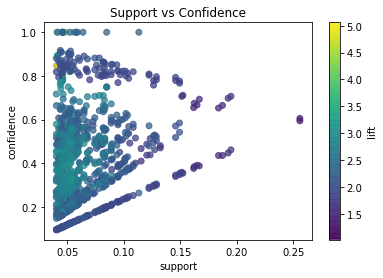

In [28]:
#Visualizing the Support Vs Confidence with lift metric
plt.scatter(Assoc_rules4['support'], Assoc_rules4['confidence'],c=Assoc_rules4['lift'],cmap= 'viridis',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

In [29]:
#Looking into the all models lift metric
Table={'Associan rule':pd.Series(['Assoc_rules1','Assoc_rules2','Assoc_rules3','Assoc_rules4']),
               'Lift':[max(Assoc_rules1.lift),max(Assoc_rules2.lift),max(Assoc_rules3.lift),max(Assoc_rules4.lift)]
               }
Table=pd.DataFrame(Table)
Table

,Associan rule,Lift
0,Assoc_rules1,2.320186
1,Assoc_rules2,1.670264
2,Assoc_rules3,1.404179
3,Assoc_rules4,5.062041


#### Insights Drawn:
>From the table Above it depicts that for all the built association rules Model4 that is association rule4's lift metric is high and suggests the more associated books compared to other rules.